#### Forecasting Using Prophet

# !pip install pystan


# !pip install  fbprophet

# pip install nbconvert

In [2]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_excel('Airlines+Data.xlsx')

In [5]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [6]:
df.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


<Figure size 1500x2000 with 0 Axes>

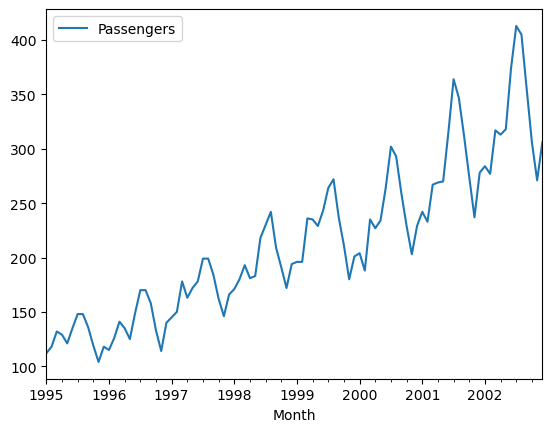

In [16]:
plt.figure(figsize = (15,20))
df.plot(x ='Month',y = 'Passengers')
plt.show()

In [17]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      96 non-null     datetime64[ns]
 1   y       96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [19]:
df.head()

,ds,y
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


# from prophet import prophet

In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [ ]:
# Initialize the Model
model=Prophet()

In [ ]:
df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zqm8zbs/1_4uozqi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zqm8zbs/_6cf3r8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91439', 'data', 'file=/tmp/tmp_zqm8zbs/1_4uozqi.json', 'init=/tmp/tmp_zqm8zbs/_6cf3r8i.json', 'output', 'file=/tmp/tmp_zqm8zbs/prophet_model2lw9ysko/prophet_model-20230805101200.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:12:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:12:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [ ]:
future_dates.tail()

,ds
456,2003-11-27
457,2003-11-28
458,2003-11-29
459,2003-11-30
460,2003-12-01


In [ ]:
df.tail()

,ds,y
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [ ]:
460-95

365

In [ ]:
prediction=model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1995-01-01,109.263693,77.276108,107.939925,109.263693,109.263693,-16.216324,-16.216324,-16.216324,-16.216324,-16.216324,-16.216324,0.0,0.0,0.0,93.047369
1,1995-02-01,111.328683,75.222072,107.710442,111.328683,111.328683,-19.470694,-19.470694,-19.470694,-19.470694,-19.470694,-19.470694,0.0,0.0,0.0,91.857989
2,1995-03-01,113.193835,108.812442,141.094726,113.193835,113.193835,11.349348,11.349348,11.349348,11.349348,11.349348,11.349348,0.0,0.0,0.0,124.543183
3,1995-04-01,115.258824,103.312557,137.534420,115.258824,115.258824,4.621302,4.621302,4.621302,4.621302,4.621302,4.621302,0.0,0.0,0.0,119.880127
4,1995-05-01,117.257202,101.237194,131.782931,117.257202,117.257202,-0.362532,-0.362532,-0.362532,-0.362532,-0.362532,-0.362532,0.0,0.0,0.0,116.894670


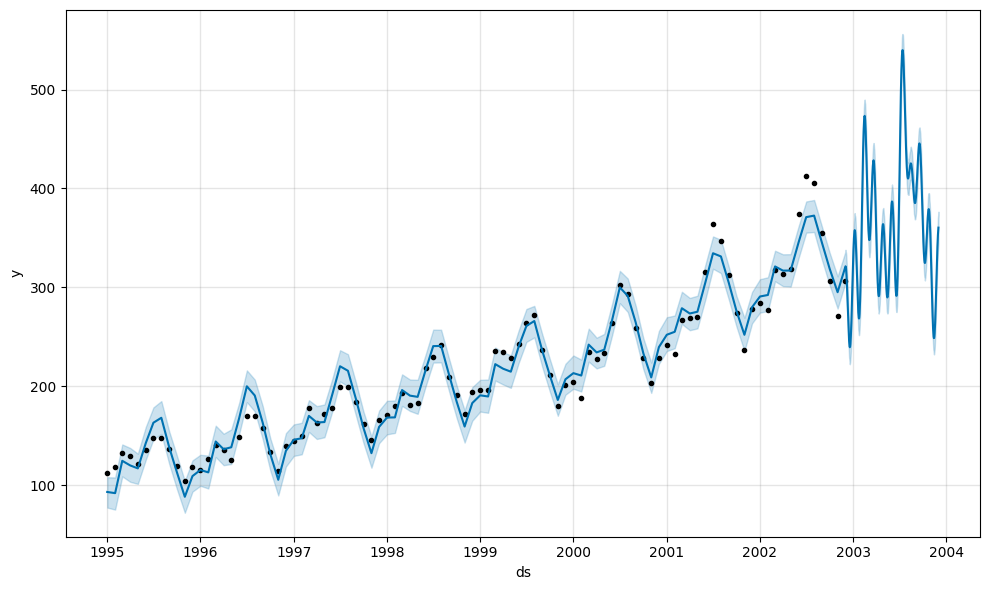

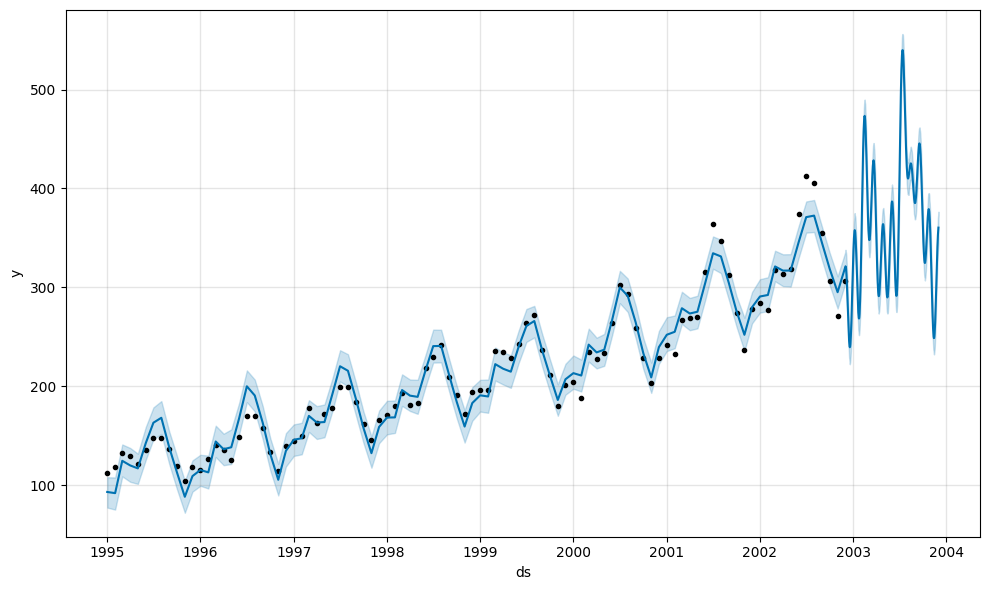

In [ ]:
### plot the predicted projection
model.plot(prediction)

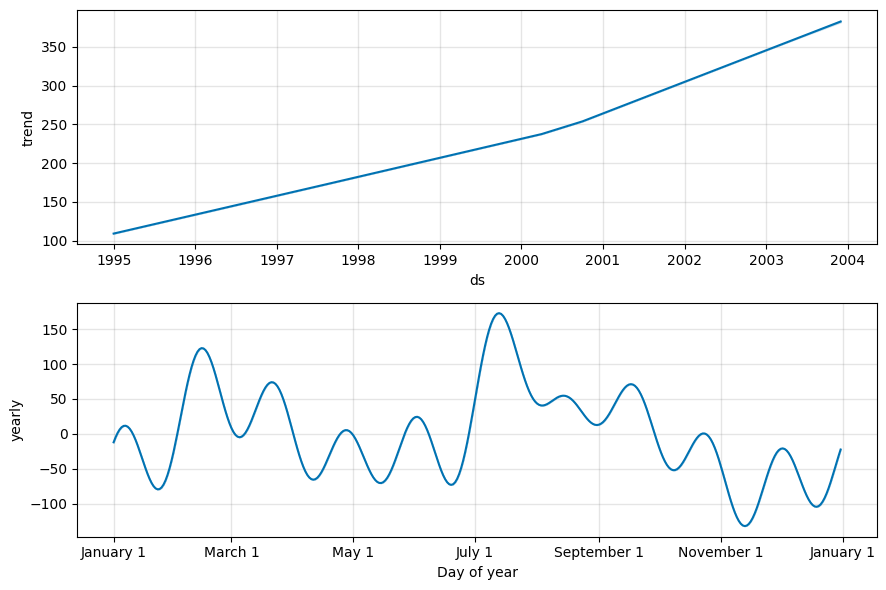

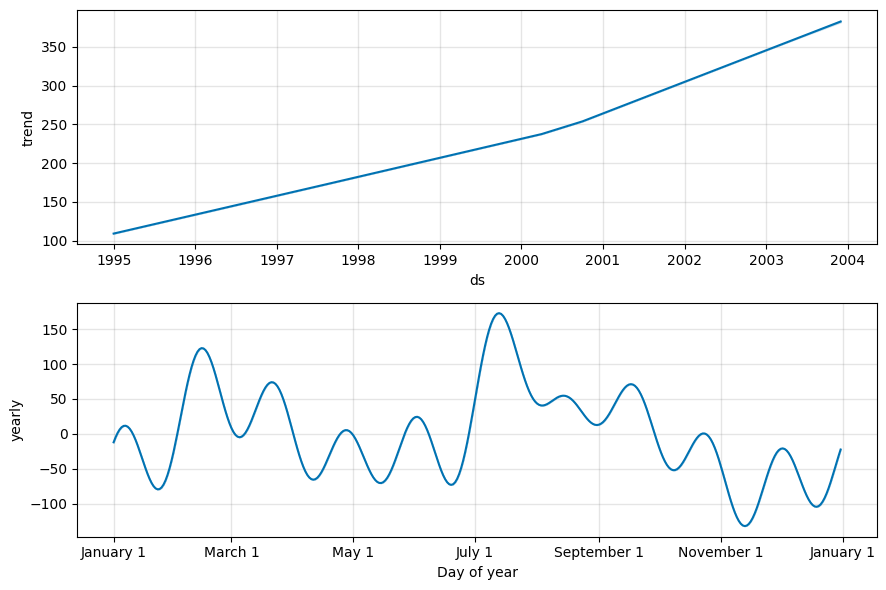

In [ ]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [ ]:
df.head()

,ds,y
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 10 forecasts with cutoffs between 1997-06-25 00:00:00 and 2001-12-01 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zqm8zbs/yy4nkusp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zqm8zbs/8o9_ok9q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35260', 'data', 'file=/tmp/tmp_zqm8zbs/yy4nkusp.json', 'init=/tmp/tmp_zqm8zbs/8o9_ok9q.json', 'output', 'file=/tmp/tmp_zqm8zbs/prophet_modelaz7_9vlu/prophet_model-20230805101623.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:16:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:16:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zqm8zbs/6jtpg3_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_zqm8zbs/sqjp9dxl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1997-07-01,199.602227,196.031767,203.102086,199,1997-06-25
1,1997-08-01,200.510919,197.182730,204.162480,199,1997-06-25
2,1997-09-01,189.510442,186.443967,193.022469,184,1997-06-25
3,1997-10-01,168.250621,164.671813,171.544607,162,1997-06-25
4,1997-11-01,151.658188,148.307535,155.217142,146,1997-06-25


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,41 days,407.564265,20.188221,12.028393,0.043509,0.019056,0.044660,0.500000
1,42 days,442.397669,21.033252,13.682702,0.050300,0.030736,0.051762,0.416667
2,46 days,454.524788,21.319587,14.418838,0.053818,0.039700,0.055133,0.416667
3,47 days,459.760362,21.442023,14.668227,0.054231,0.042180,0.055564,0.416667
4,51 days,621.550625,24.930917,18.091506,0.072496,0.054326,0.071781,0.333333


In [ ]:
df_p

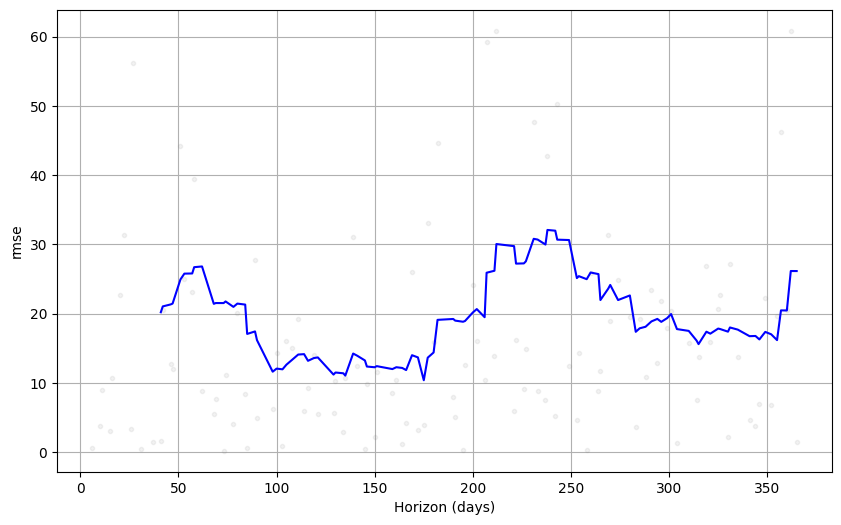

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')